In [ ]:
# Load the california housing dataset
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# extract the features and target variable
X = df.drop('MedHouseVal', axis=1).values
y = df['MedHouseVal'].values

X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
# split into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# add a column of ones to the feature matrix for the bias term
X_train = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [ ]:
import tensorflow as tf

def gradient_descent(X, y, learning_rate, epochs):
  theta = tf.Variable(tf.random.uniform(shape=(X.shape[1], 1), minval=-1.0, maxval=1.0, dtype=tf.float32))
  X = tf.constant(X, dtype=tf.float32)
  y = tf.constant(y, dtype=tf.float32)
  y = tf.reshape(y, (-1, 1))
  training_loss = []
  for _ in range(epochs):
    with tf.GradientTape() as tape:
      y_pred = tf.matmul(X, theta)
      # MSE
      loss = tf.reduce_mean(tf.square(y_pred - y))
      training_loss.append(loss)
    gradient = tape.gradient(loss, theta)
    theta.assign_sub(learning_rate * gradient)
  return theta, training_loss

theta, training_loss = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000)
theta

<tf.Variable 'Variable:0' shape=(9, 1) dtype=float32, numpy=
array([[ 2.0719411 ],
       [ 0.84048015],
       [ 0.14049457],
       [-0.23190483],
       [ 0.2697584 ],
       [ 0.00391805],
       [-0.04210666],
       [-0.77080363],
       [-0.74022466]], dtype=float32)>

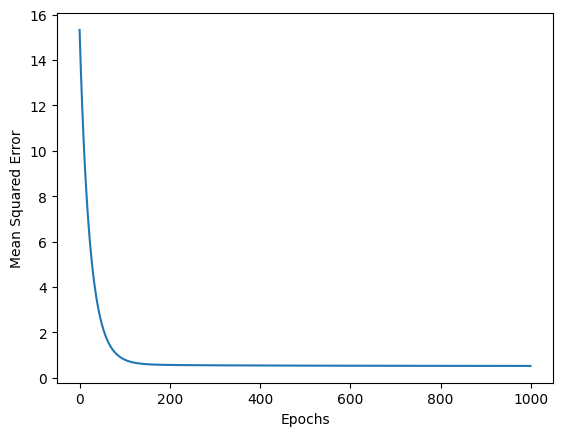

In [ ]:
# plot the errors
import matplotlib.pyplot as plt

plt.plot(training_loss)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
X_tensor = tf.constant(X_test, dtype=tf.float32)
y_tensor = tf.constant(y_test, dtype=tf.float32)
y_tensor = tf.reshape(y_tensor, (-1, 1))

y_pred_test = tf.matmul(X_tensor, theta)
mse = tf.reduce_mean(tf.square(y_pred_test - y_tensor))
print("Mean Squared Error on test set:", mse.numpy())

r2 = 1 - (tf.reduce_sum(tf.square(y_pred_test - y_tensor)) / tf.reduce_sum(tf.square(y_tensor - tf.reduce_mean(y_tensor))))
print("R-squared on test set:", r2.numpy())

Mean Squared Error on test set: 0.55122244
R-squared on test set: 0.5793508
